In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('example_stats_history.csv')

data = {}

balance_transfers = df[df['Name'] == 'Transfer Balance'].dropna()
balance_transfers['Total Gas Used'] = df['Total Average Content Size'] * df['Requests/s']
erc20_transfers = df[df['Name'] == 'Transfer ERC20 Token'].dropna()


ParserError: Error tokenizing data. C error: Expected 24 fields in line 9, saw 66


In [4]:
def plot_inclusion_time_vs_tps(df):
    # Extract the relevant columns
    tx_per_sec = df['Requests/s']  # Transaction per second (TPS)
    avg_tx_latency = df['Total Average Response Time']  # Average Transaction Latency
    max_tx_latency = df['Total Max Response Time']  # Max Transaction Latency
    min_tx_latency = df['Total Min Response Time']  # Min Transaction Latency

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot Average Transaction Latency vs TPS
    plt.plot(tx_per_sec, avg_tx_latency, label='Average Inclusion Time', marker='o', linestyle='-', color='b')

    # Plot Max Transaction Latency vs TPS
    plt.plot(tx_per_sec, max_tx_latency, label='Max Inclusion Time', marker='x', linestyle='--', color='r')

    # Plot Min Transaction Latency vs TPS
    plt.plot(tx_per_sec, min_tx_latency, label='Min Inclusion Time', marker='s', linestyle='-.', color='g')

    # Add labels and title
    plt.xlabel('Transactions per Second (TPS)')
    plt.ylabel('Response Time (ms)')
    plt.title('Inclusion Time vs TPS (Average, Max, and Min Inclusion Time)')

    # Add a legend to differentiate the lines
    plt.legend()

    # Add a grid for better readability
    plt.grid(True)

    # Display the plot
    plt.show()

In [5]:
def plot_inclusion_time_vs_slot_access_per_sec(df):
    # Calculate Slot Accesses per Second (as double of Transactions per Second)
    slot_access_per_second = df['Requests/s'] * 2  # Slot accesses per second
    avg_tx_latency = df['Total Average Response Time']  # Average Transaction Latency

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(slot_access_per_second, avg_tx_latency, marker='o', linestyle='-', color='b')

    # Add labels and title
    plt.xlabel('Slot Accesses per Second')
    plt.ylabel('Average Transaction Latency (ms)')
    plt.title('Inclusion Time vs Slot Accesses per Second')

    # Add a grid for better readability
    plt.grid(True)

    # Display the plot
    plt.show()

In [6]:
def plot_total_gas_used(df):
    # Extract the relevant columns
    df['Timestamp'] = df['Timestamp'].astype(int)
    timestamp_min = df['Timestamp'].min()  # Get the minimum timestamp
    time = df['Timestamp'] - timestamp_min  # Subtract min timestamp to normalize time
    tx_per_second = df['Requests/s']  # Transaction per second (TPS)
    total_gas_used = df['Total Average Content Size'] * tx_per_second  # Total Gas Used

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot Total Gas Used vs TPS
    plt.plot(tx_per_second, total_gas_used, marker='o', linestyle='-', color='b')

    # Add labels and title
    plt.xlabel('Transactions per Second (TPS)')
    plt.ylabel('Total Gas Used')
    plt.title('Total Gas Used vs Transactions per Second (TPS)')

    # Add a grid for better readability
    plt.grid(True)

    # Display the plot
    plt.show()

In [7]:
def plot_time_series(df, colname):
    # Extract Transactions per second (TPS)
    tx_per_second = df[colname]

    df['Timestamp'] = df['Timestamp'].astype(int)
    # Convert timestamp to a meaningful value for plotting
    timestamp_min = df['Timestamp'].min()  # Get the minimum timestamp
    time = df['Timestamp'] - timestamp_min  # Subtract min timestamp to normalize time

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(time, tx_per_second, marker='o', linestyle='-', color='b')

    # Add labels and title
    plt.xlabel('Time (seconds)')
    plt.ylabel(colname)
    plt.title(f'{colname} (TPS) over Time')

    # Add a grid for better readability
    plt.grid(True)

    # Display the plot
    plt.show()

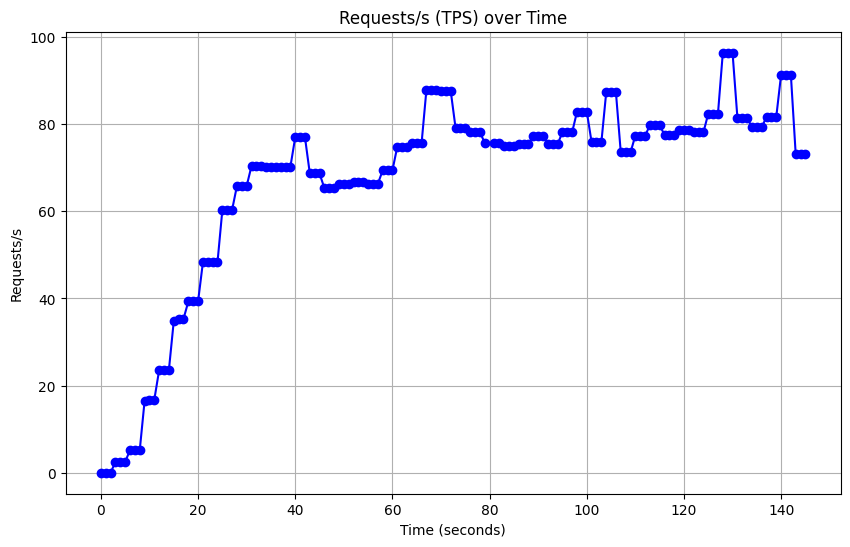

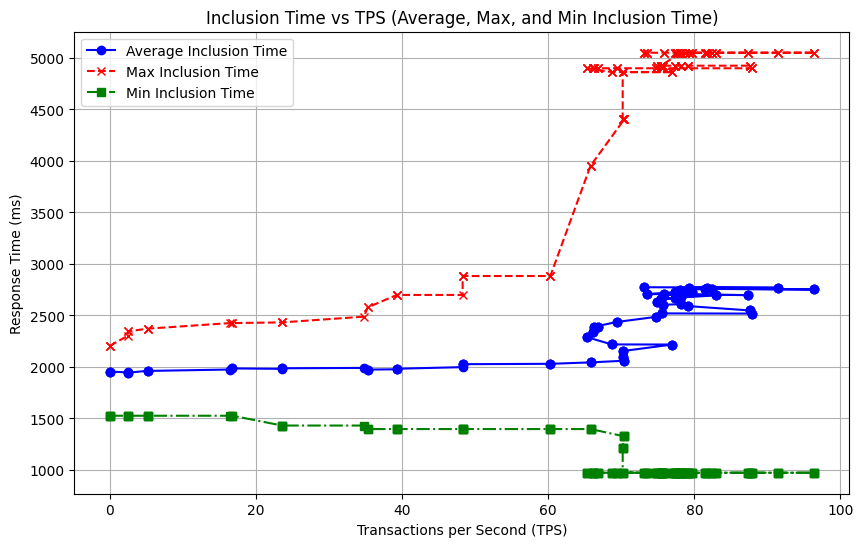

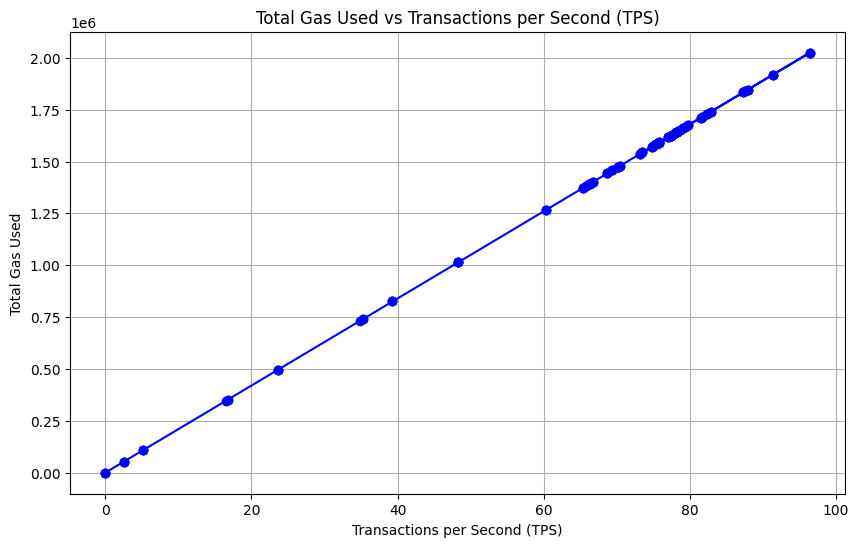

In [9]:
plot_time_series(balance_transfers, 'Requests/s')
plot_inclusion_time_vs_tps(balance_transfers)
plot_total_gas_used(balance_transfers)

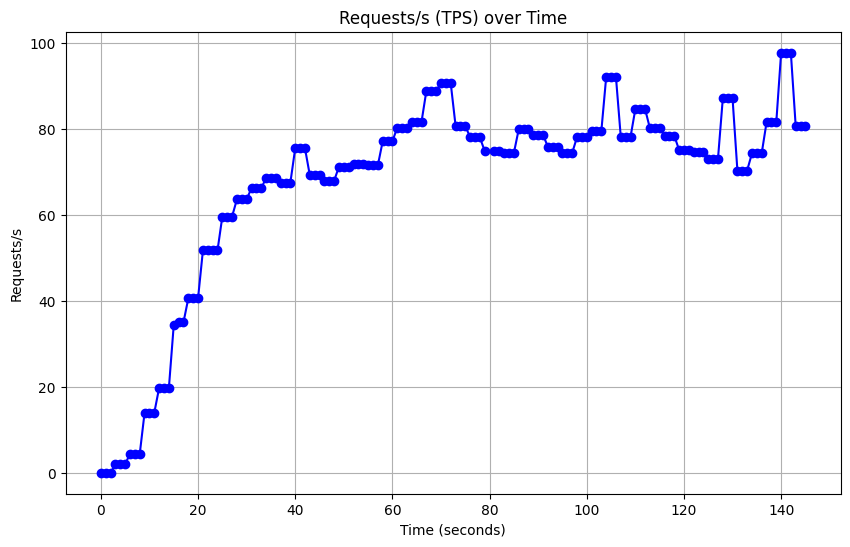

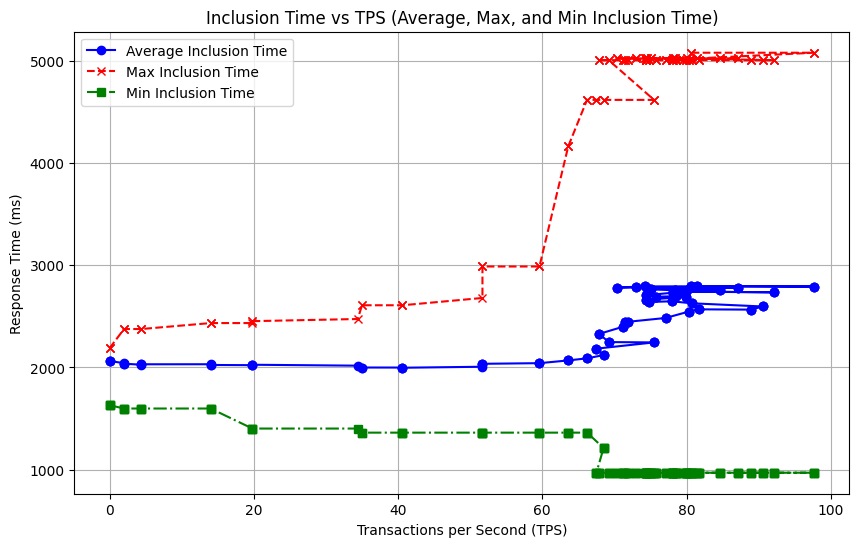

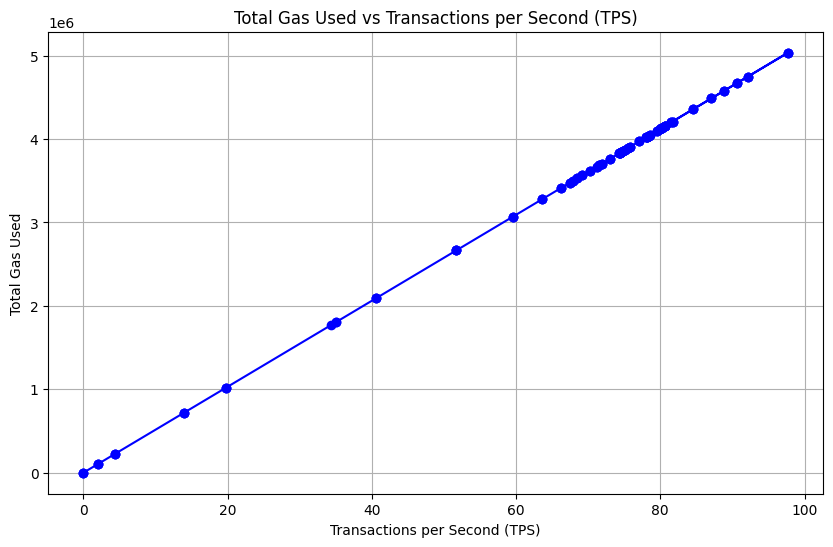

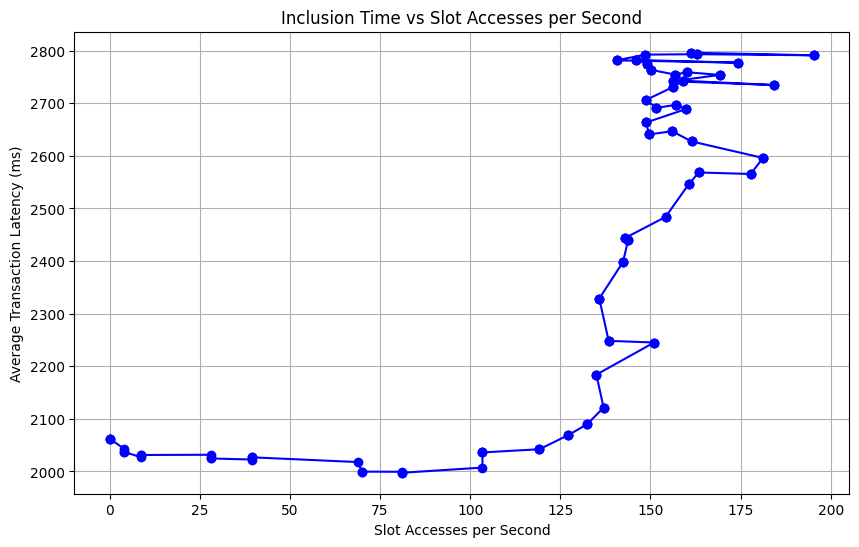

In [12]:
plot_time_series(erc20_transfers, 'Requests/s')
plot_inclusion_time_vs_tps(erc20_transfers)
plot_total_gas_used(erc20_transfers)
plot_inclusion_time_vs_slot_access_per_sec(erc20_transfers)